<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_2_4_n60_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/addition_pattern/addition_delta_2.4'

In [4]:
os.listdir(base_path)

['data_add_delta_2.4_n20.csv',
 'data_add_delta_2.4_n30.csv',
 'data_add_delta_2.4_n60.csv',
 'data_add_delta_2.4_n120.csv',
 'data_add_delta_2.4_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_2.4_n60.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,57.457086,62.701320,45.945446,26871.560610,27047.664462,6143.678265,20903.986197
1,0.0,1.0,34.262832,37.899250,91.490082,4379.185590,4552.837755,-128.140170,4680.977925
2,0.0,2.0,95.670993,20.234168,85.113239,-345.019786,-134.001386,-10685.481748,10551.480362
3,0.0,3.0,95.553161,69.966108,49.366351,-14511.772766,-14286.887145,2317.479276,-16604.366421
4,0.0,4.0,98.832496,30.829174,55.900478,1380.941335,1576.503483,-6174.708485,7751.211968
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,93.299207,93.048126,33.762228,-102638.760553,-102408.650992,1083.797672,-103492.448664
59996,999.0,56.0,34.908171,72.890802,21.095673,5033.086571,5171.981217,6503.616064,-1331.634848
59997,999.0,57.0,76.123675,62.530039,58.381820,42531.898805,42738.934340,-2013.920062,44752.854401
59998,999.0,58.0,80.781519,44.663676,56.479440,-8355.983299,-8164.058664,858.706016,-9022.764679


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,57.457086,62.701320,45.945446,26871.560610,27047.664462,6143.678265,20903.986197
1,0.0,1.0,34.262832,37.899250,91.490082,4379.185590,4552.837755,-128.140170,4680.977925
2,0.0,2.0,95.670993,20.234168,85.113239,-345.019786,-134.001386,-10685.481748,10551.480362
3,0.0,3.0,95.553161,69.966108,49.366351,-14511.772766,-14286.887145,2317.479276,-16604.366421
4,0.0,4.0,98.832496,30.829174,55.900478,1380.941335,1576.503483,-6174.708485,7751.211968
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,93.299207,93.048126,33.762228,-102638.760553,-102408.650992,1083.797672,-103492.448664
59996,999.0,56.0,34.908171,72.890802,21.095673,5033.086571,5171.981217,6503.616064,-1331.634848
59997,999.0,57.0,76.123675,62.530039,58.381820,42531.898805,42738.934340,-2013.920062,44752.854401
59998,999.0,58.0,80.781519,44.663676,56.479440,-8355.983299,-8164.058664,858.706016,-9022.764679


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2  ...         y_hat          e_hat
rep   index                        ...                             
0.0   0.0    57.457086  62.701320  ...   6143.678265   20903.986197
      1.0    34.262832  37.899250  ...   -128.140170    4680.977925
      2.0    95.670993  20.234168  ... -10685.481748   10551.480362
      3.0    95.553161  69.966108  ...   2317.479276  -16604.366421
      4.0    98.832496  30.829174  ...  -6174.708485    7751.211968
...                ...        ...  ...           ...            ...
999.0 55.0   93.299207  93.048126  ...   1083.797672 -103492.448664
      56.0   34.908171  72.890802  ...   6503.616064   -1331.634848
      57.0   76.123675  62.530039  ...  -2013.920062   44752.854401
      58.0   80.781519  44.663676  ...    858.706016   -9022.764679
      59.0   76.342002  87.531071  ...   -783.079713    7798.605914

[60000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2  ...         y_hat          e_hat
rep   index                        ...                             
0.0   0.0    57.457086  62.701320  ...   6143.678265   20903.986197
      1.0    34.262832  37.899250  ...   -128.140170    4680.977925
      2.0    95.670993  20.234168  ... -10685.481748   10551.480362
      3.0    95.553161  69.966108  ...   2317.479276  -16604.366421
      4.0    98.832496  30.829174  ...  -6174.708485    7751.211968
...                ...        ...  ...           ...            ...
999.0 55.0   93.299207  93.048126  ...   1083.797672 -103492.448664
      56.0   34.908171  72.890802  ...   6503.616064   -1331.634848
      57.0   76.123675  62.530039  ...  -2013.920062   44752.854401
      58.0   80.781519  44.663676  ...    858.706016   -9022.764679
      59.0   76.342002  87.531071  ...   -783.079713    7798.605914

[60000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,57.457086,62.701320,45.945446,26871.560610,27047.664462,6143.678265,20903.986197
1,0.0,1.0,34.262832,37.899250,91.490082,4379.185590,4552.837755,-128.140170,4680.977925
2,0.0,2.0,95.670993,20.234168,85.113239,-345.019786,-134.001386,-10685.481748,10551.480362
3,0.0,3.0,95.553161,69.966108,49.366351,-14511.772766,-14286.887145,2317.479276,-16604.366421
4,0.0,4.0,98.832496,30.829174,55.900478,1380.941335,1576.503483,-6174.708485,7751.211968
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,93.299207,93.048126,33.762228,-102638.760553,-102408.650992,1083.797672,-103492.448664
59996,999.0,56.0,34.908171,72.890802,21.095673,5033.086571,5171.981217,6503.616064,-1331.634848
59997,999.0,57.0,76.123675,62.530039,58.381820,42531.898805,42738.934340,-2013.920062,44752.854401
59998,999.0,58.0,80.781519,44.663676,56.479440,-8355.983299,-8164.058664,858.706016,-9022.764679


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2  ...         y_hat          e_hat
rep   index                        ...                             
0.0   0.0    57.457086  62.701320  ...   6143.678265   20903.986197
      1.0    34.262832  37.899250  ...   -128.140170    4680.977925
      2.0    95.670993  20.234168  ... -10685.481748   10551.480362
      3.0    95.553161  69.966108  ...   2317.479276  -16604.366421
      4.0    98.832496  30.829174  ...  -6174.708485    7751.211968
...                ...        ...  ...           ...            ...
999.0 55.0   93.299207  93.048126  ...   1083.797672 -103492.448664
      56.0   34.908171  72.890802  ...   6503.616064   -1331.634848
      57.0   76.123675  62.530039  ...  -2013.920062   44752.854401
      58.0   80.781519  44.663676  ...    858.706016   -9022.764679
      59.0   76.342002  87.531071  ...   -783.079713    7798.605914

[60000 rows x 7 columns]

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]

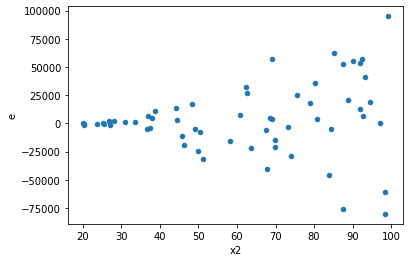

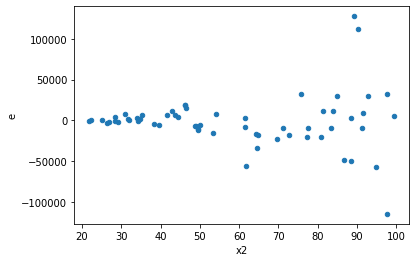

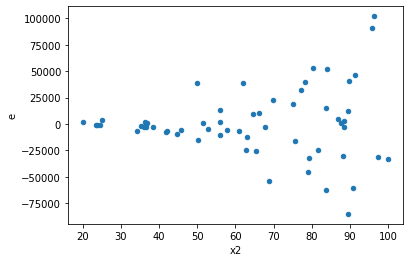

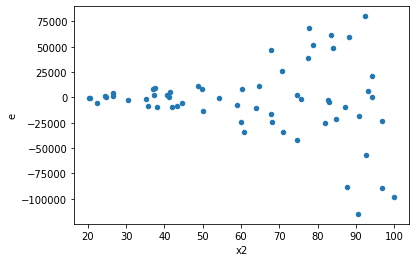

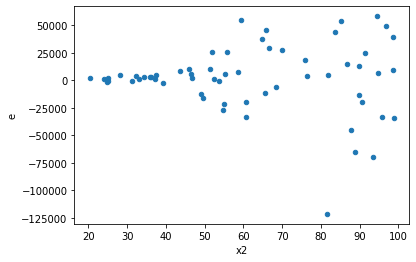

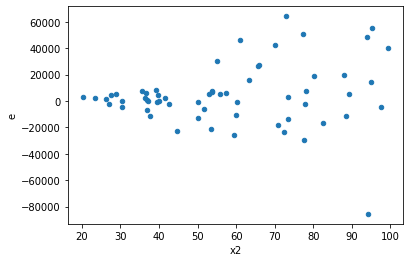

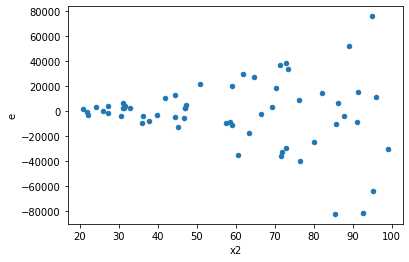

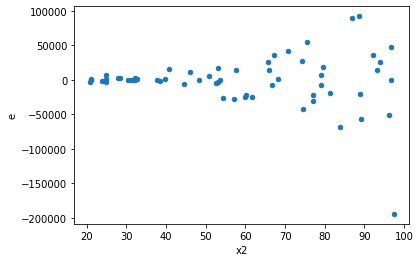

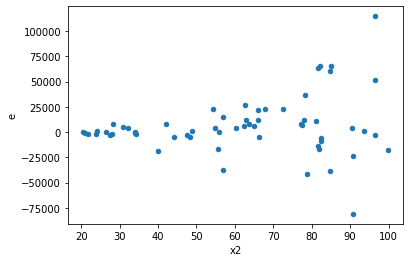

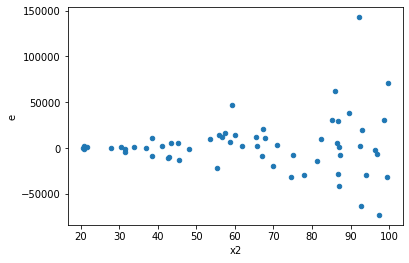

In [13]:
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [14]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = model1.mse_resid


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = model2.mse_resid

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    
    return df2, df1, SSE2, SSE1, MSE2, MSE1, GQ_test, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,Result_test
Replicate,,,,,,,,,,
0.0,21.0,21.0,45448336699.28102,1757616572.899107,2272416834.9640512,87880828.64495535,25.857935911651143,2.5674351533666595e-10,0.9999999998716282,Reject001=0 : Heteroscedasticity
1.0,21.0,21.0,51693343501.60174,478757120.8856913,2584667175.0800867,23937856.044284564,107.9740462261325,2.220446049250313e-16,0.9999999999999999,Reject001=0 : Heteroscedasticity
2.0,21.0,21.0,40525057965.9232,2169399043.4330616,2026252898.2961602,108469952.17165308,18.680315218445255,5.946799941369818e-09,0.9999999970266,Reject001=0 : Heteroscedasticity
3.0,21.0,21.0,48967465153.72455,684009282.685573,2448373257.6862273,34200464.13427865,71.58888979030718,9.325873406851315e-15,0.9999999999999953,Reject001=0 : Heteroscedasticity
4.0,21.0,21.0,35921491939.845314,1223938392.616968,1796074596.9922657,61196919.63084839,29.349101357168525,7.39370786817517e-11,0.9999999999630315,Reject001=0 : Heteroscedasticity
5.0,21.0,21.0,24232544680.134583,937100875.0352753,1211627234.0067291,46855043.75176377,25.85905672025159,2.566347134802527e-10,0.9999999998716826,Reject001=0 : Heteroscedasticity
6.0,21.0,21.0,34948706888.34292,736490361.5560967,1747435344.417146,36824518.07780483,47.45304040979083,6.066258606551855e-13,0.9999999999996967,Reject001=0 : Heteroscedasticity
7.0,21.0,21.0,61935945407.298874,384101233.64747745,3096797270.3649435,19205061.682373874,161.2490145349098,2.220446049250313e-16,0.9999999999999999,Reject001=0 : Heteroscedasticity
8.0,21.0,21.0,36969555201.56007,1316351296.5069504,1848477760.0780034,65817564.82534752,28.08487012521802,1.1411271927386224e-10,0.9999999999429436,Reject001=0 : Heteroscedasticity


In [16]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,21.0,21.0,45448336699.28102,1757616572.899107,2272416834.9640512,87880828.64495535,25.857935911651143,2.5674351533666595e-10,Reject001=0 : Heteroscedasticity
1.0,21.0,21.0,51693343501.60174,478757120.8856913,2584667175.0800867,23937856.044284564,107.9740462261325,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
2.0,21.0,21.0,40525057965.9232,2169399043.4330616,2026252898.2961602,108469952.17165308,18.680315218445255,5.946799941369818e-09,Reject001=0 : Heteroscedasticity
3.0,21.0,21.0,48967465153.72455,684009282.685573,2448373257.6862273,34200464.13427865,71.58888979030718,9.325873406851315e-15,Reject001=0 : Heteroscedasticity
4.0,21.0,21.0,35921491939.845314,1223938392.616968,1796074596.9922657,61196919.63084839,29.349101357168525,7.39370786817517e-11,Reject001=0 : Heteroscedasticity
5.0,21.0,21.0,24232544680.134583,937100875.0352753,1211627234.0067291,46855043.75176377,25.85905672025159,2.566347134802527e-10,Reject001=0 : Heteroscedasticity
6.0,21.0,21.0,34948706888.34292,736490361.5560967,1747435344.417146,36824518.07780483,47.45304040979083,6.066258606551855e-13,Reject001=0 : Heteroscedasticity
7.0,21.0,21.0,61935945407.298874,384101233.64747745,3096797270.3649435,19205061.682373874,161.2490145349098,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
8.0,21.0,21.0,36969555201.56007,1316351296.5069504,1848477760.0780034,65817564.82534752,28.08487012521802,1.1411271927386224e-10,Reject001=0 : Heteroscedasticity


In [17]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    1000
Name: Result_test, dtype: int64